One_Hot_Encodeing

In [1]:
import pandas as pd
data = pd.read_csv("/home/pi/data science/introduction_to_ml_with_python-master/data/adult.data", header=None, index_col=False,
 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])

In [2]:
data.shape

(32561, 15)

In [3]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]

In [4]:
display((data.head()))

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
data.shape

(32561, 7)

In [6]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [7]:
print("Original Feature:\n",list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("Feature after get_dummies:\n",list(data_dummies.columns))

Original Feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feature after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
import numpy as np
(np.arange(10)[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [11]:
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [12]:
features.shape

(32561, 44)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test Score: {}".format(logreg.score(X_test,y_test)))

Test Score: 0.8067804937968308


/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Numbers Can Encode Categoricals

In [14]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

In [15]:
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [16]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [17]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Binning, Discretization, Linear Models, and Trees

In [18]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


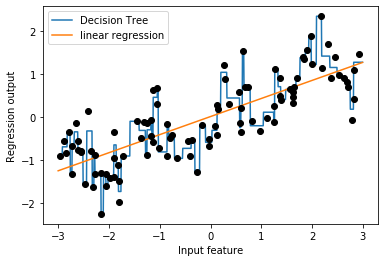

In [19]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label = 'Decision Tree')
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

In [20]:
bins = np.linspace(-3,3,11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [21]:
which_bin = np.digitize(X,bins = bins)
print("\nData Points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


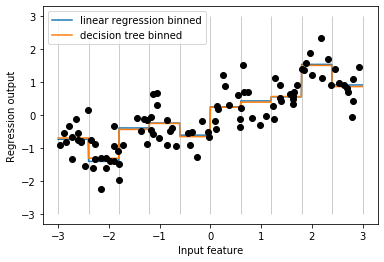

In [24]:
%matplotlib inline
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature");

## Interactions and Polynomials

In [25]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [26]:
reg = LinearRegression().fit(X_combined,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

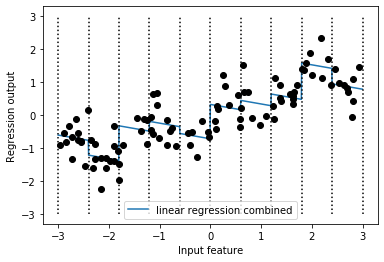

In [27]:
line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='linear regression combined')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [28]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


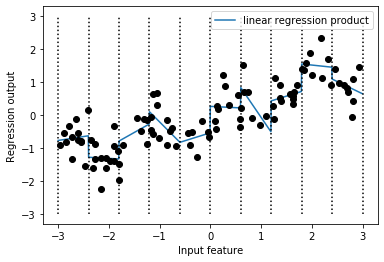

In [29]:
reg = LinearRegression().fit(X_product,y)
line_product =np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [31]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [32]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [33]:
print("Polynomial feature names:\n {}".format(poly.get_feature_names()))

Polynomial feature names:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


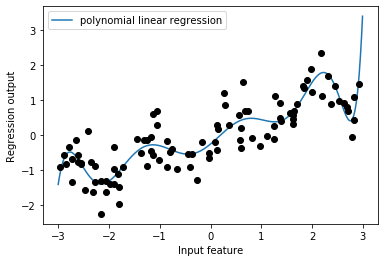

In [34]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

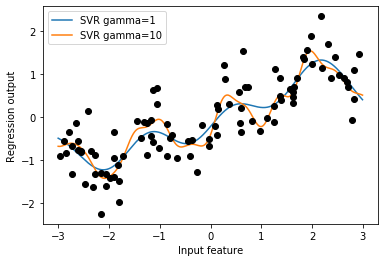

In [35]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [38]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print('Score without interaction : {:.3f}'.format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
 ridge.score(X_test_poly, y_test)))

Score without interaction : 0.621
Score with interactions: 0.753


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(
 rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.795
Score with interactions: 0.779


## Univariate Nonlinear Transformations

In [41]:
rng = np.random.RandomState(0)
X_org = rng.normal(size=(1000,3))
w = rng.normal(size=3)
X = rng.poisson(10*np.exp(X_org))
y = np.dot(X_org,w)

In [42]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

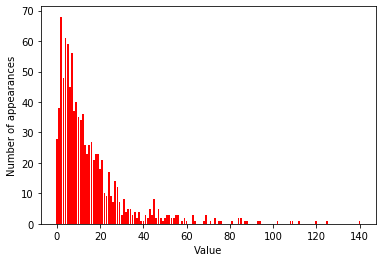

In [43]:
%matplotlib inline
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [44]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [45]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

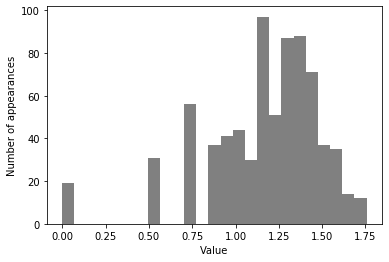

In [46]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [47]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## Automatic Feature Selection

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [49]:
cancer = load_breast_cancer()

In [50]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

In [51]:
X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [52]:
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [53]:
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [54]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


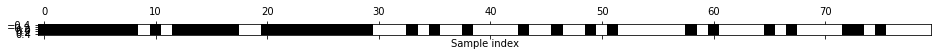

In [55]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index");

In [56]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

In [57]:
lr  = LogisticRegression()
lr.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
 lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.919


/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=42),threshold="median")

In [59]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'sample index')

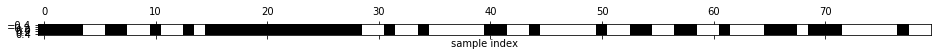

In [60]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('sample index')

In [61]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train,).score(X_test_l1,y_test)
print('test Socre: {:.3f}'.format(score))

test Socre: 0.912


/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


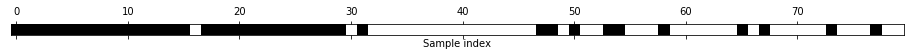

In [62]:
from sklearn.ensemble.forest import RandomForestClassifier
%matplotlib inline

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(());

In [63]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


/home/pi/.virtualenvs/cv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


## Utilizing Expert Knowledge

In [65]:
citibike = mglearn.datasets.load_citibike()

In [66]:
print("citi bike data :\n {}".format(citibike.head()))

citi bike data :
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [67]:
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
 freq='D')
xticks

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')

Text(0, 0.5, 'Rentals')

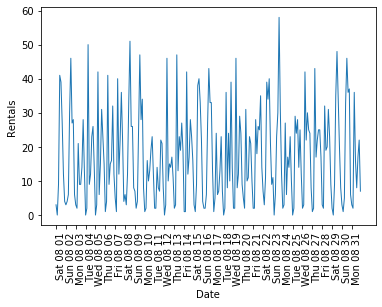

In [68]:
plt.xticks(xticks,xticks.strftime("%a %m %d"),rotation=90,ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [69]:
y = citibike.values
X= citibike.index.strftime("%s").astype("int").values.reshape(-1,1)

In [70]:
n_train = 184
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
 # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
 # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
    ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

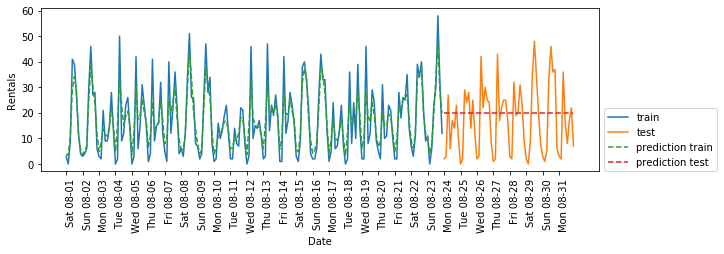

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


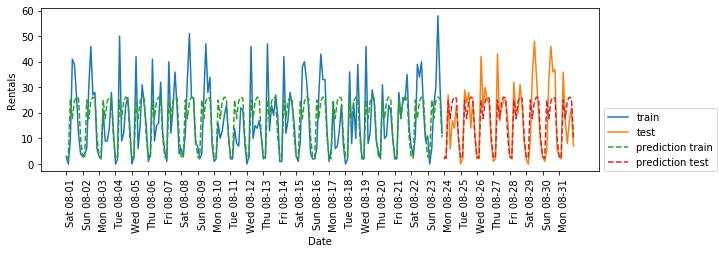

In [74]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

Test-set R^2: 0.84


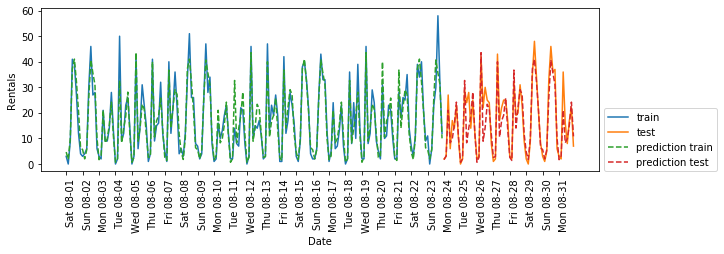

In [77]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
 citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week,y,regressor)

Test-set R^2: 0.13


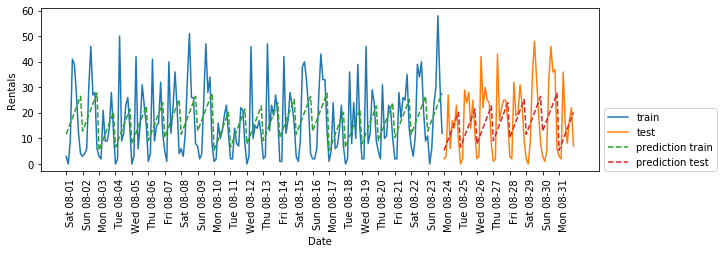

In [78]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

In [81]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [82]:
X_hour_week_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [83]:
X_hour_week

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3],
       [ 6,  6],
       [ 6,  9],
       [ 6, 12],
       [ 6, 15],
       [ 6, 18],
       [ 6, 21],
       [ 0,  0],
       [ 0,  3],
       [ 0,  6],
       [ 0,  9],
       [ 0, 12],
       [ 0, 15],
       [ 0, 18],
       [ 0, 21],
       [ 1,  0],
       [ 1,  3],
       [ 1,  6],
       [ 1,  9],
       [ 1, 12],
       [ 1, 15],
       [ 1, 18],
       [ 1, 21],
       [ 2,  0],
       [ 2,  3],
       [ 2,  6],
       [ 2,  9],
       [ 2, 12],
       [ 2, 15],
       [ 2, 18],
       [ 2, 21],
       [ 3,  0],
       [ 3,  3],
       [ 3,  6],
       [ 3,  9],
       [ 3, 12],
       [ 3, 15],
       [ 3, 18],
       [ 3, 21],
       [ 4,  0],
       [ 4,  3],
       [ 4,  6],
       [ 4,  9],
       [ 4, 12],
       [ 4, 15],
       [ 4, 18],
       [ 4, 21],
       [ 5,  0],
       [ 5,  3],
       [ 5,  6

Test-set R^2: 0.62


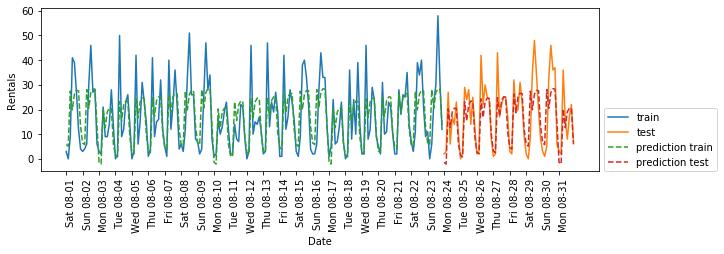

In [84]:
eval_on_features(X_hour_week_onehot,y,Ridge())

Test-set R^2: 0.85


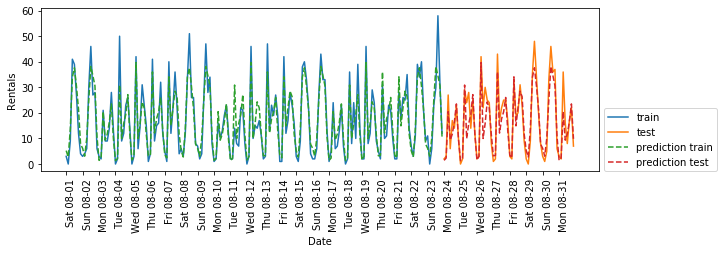

In [85]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
 include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [86]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
hour

['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']

In [87]:
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour
features

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [89]:
features_poly = poly_transformer.get_feature_names(features)
features_poly

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00',
 'Mon Tue',
 'Mon Wed',
 'Mon Thu',
 'Mon Fri',
 'Mon Sat',
 'Mon Sun',
 'Mon 00:00',
 'Mon 03:00',
 'Mon 06:00',
 'Mon 09:00',
 'Mon 12:00',
 'Mon 15:00',
 'Mon 18:00',
 'Mon 21:00',
 'Tue Wed',
 'Tue Thu',
 'Tue Fri',
 'Tue Sat',
 'Tue Sun',
 'Tue 00:00',
 'Tue 03:00',
 'Tue 06:00',
 'Tue 09:00',
 'Tue 12:00',
 'Tue 15:00',
 'Tue 18:00',
 'Tue 21:00',
 'Wed Thu',
 'Wed Fri',
 'Wed Sat',
 'Wed Sun',
 'Wed 00:00',
 'Wed 03:00',
 'Wed 06:00',
 'Wed 09:00',
 'Wed 12:00',
 'Wed 15:00',
 'Wed 18:00',
 'Wed 21:00',
 'Thu Fri',
 'Thu Sat',
 'Thu Sun',
 'Thu 00:00',
 'Thu 03:00',
 'Thu 06:00',
 'Thu 09:00',
 'Thu 12:00',
 'Thu 15:00',
 'Thu 18:00',
 'Thu 21:00',
 'Fri Sat',
 'Fri Sun',
 'Fri 00:00',
 'Fri 03:00',
 'Fri 06:00',
 'Fri 09:00',
 'Fri 12:00',
 'Fri 15:00',
 'Fri 18:00',
 'Fri 21:00',
 'Sat Sun',
 'Sat 00:00',
 'Sat 03:00',
 'Sat 06:00',
 'Sat 09:0

In [90]:
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
features_nonzero

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00',
       '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', 'Mon 00:00',
       'Mon 03:00', 'Mon 06:00', 'Mon 09:00', 'Mon 12:00', 'Mon 15:00',
       'Mon 18:00', 'Mon 21:00', 'Tue 00:00', 'Tue 03:00', 'Tue 06:00',
       'Tue 09:00', 'Tue 12:00', 'Tue 15:00', 'Tue 18:00', 'Tue 21:00',
       'Wed 00:00', 'Wed 03:00', 'Wed 06:00', 'Wed 09:00', 'Wed 12:00',
       'Wed 15:00', 'Wed 18:00', 'Wed 21:00', 'Thu 00:00', 'Thu 03:00',
       'Thu 06:00', 'Thu 09:00', 'Thu 12:00', 'Thu 15:00', 'Thu 18:00',
       'Thu 21:00', 'Fri 00:00', 'Fri 03:00', 'Fri 06:00', 'Fri 09:00',
       'Fri 12:00', 'Fri 15:00', 'Fri 18:00', 'Fri 21:00', 'Sat 00:00',
       'Sat 03:00', 'Sat 06:00', 'Sat 09:00', 'Sat 12:00', 'Sat 15:00',
       'Sat 18:00', 'Sat 21:00', 'Sun 00:00', 'Sun 03:00', 'Sun 06:00',
       'Sun 09:00', 'Sun 12:00', 'Sun 15:00', 'Sun 18:00', 'Sun 21:00'],
      dtype='<U11')

In [92]:
coef_nonzero = lr.coef_[lr.coef_ != 0]
coef_nonzero

array([ -4.16724739,  -1.59581882,  -0.52439024,  -0.06010453,
         1.22560976,   2.26367831,   2.85827291, -11.69389764,
       -12.11122047,   8.61318898,  -0.07972441,   5.36909449,
         7.24311024,   7.63681102,  -4.9773622 ,   0.71826731,
         2.03125943,  -0.51204766,  -2.99236262,  -6.07897679,
        -3.2344886 ,   3.47023581,   2.43086573,  -1.96030412,
        -0.647312  ,   7.30938092,  -4.92093404,  -4.50754822,
        -2.91306003,   4.54166438,   1.5022943 ,  -2.76387555,
        -0.95088343,  15.00580949,  -5.97450547,  -5.56111965,
         1.03336854,  -1.76190705,   0.44872287,  -1.61208984,
        -1.04909771,  10.9075952 ,  -4.32271976,  -4.15933393,
        -3.31484574,   1.88987867,   1.60050859,  -2.57637555,
        -3.26338343,   7.69330949,  -2.78700547,  -1.12361965,
         3.47086854,   0.92559295,  -1.11377713,  -1.9119221 ,
        -3.97806383, -13.75759139,  15.19673932,  13.4376842 ,
         4.3384716 ,  -4.97648903,  -6.08515045,  -1.58

Text(0, 0.5, 'Feature')

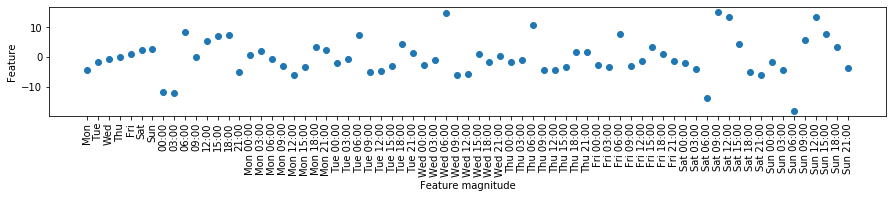

In [93]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")